In [40]:
#7-1
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
df = pd.read_csv("github_bot_raw_data.csv")
df = df.drop_duplicates()
print(df)
print(df.shape)

       actor_id  label      login        id               node_id  \
0       1081405  Human    dlazesz   1081405  MDQ6VXNlcjEwODE0MDU=   
1      13100598  Human  sarkiroka  13100598  MDQ6VXNlcjEzMTAwNTk4   
2         22494  Human  ZoomQuiet     22494      MDQ6VXNlcjIyNDk0   
3       7648032    Bot   AlCutter   7648032  MDQ6VXNlcjc2NDgwMzI=   
4       2163522  Human    meetyan   2163522  MDQ6VXNlcjIxNjM1MjI=   
...         ...    ...        ...       ...                   ...   
20344   8052756    Bot    tbreeds   8052756  MDQ6VXNlcjgwNTI3NTY=   
20345  34321341  Human     ssisil  34321341  MDQ6VXNlcjM0MzIxMzQx   
20346  15847407  Human   dbfannin  15847407  MDQ6VXNlcjE1ODQ3NDA3   
20347  94929125  Human    jambayk  94929125          U_kgDOBaiA5Q   
20348  18622487    Bot     G3rrus  18622487  MDQ6VXNlcjE4NjIyNDg3   

                                              avatar_url  gravatar_id  \
0      https://avatars.githubusercontent.com/u/108140...          NaN   
1      https://avatars.gi

In [41]:
#7-2
df = df.drop(columns=['gravatar_id'])
print(df.isnull().sum()[df.isnull().sum().values > 0])#返回有NAN值的列和对应NAN值个数
df["hireable"] = df["hireable"].astype(bool)
df["company"] = df["company"].astype(bool)
df["location"] = df["location"].astype(bool)
df = df.fillna("")
print(df.isnull().sum()[df.isnull().sum().values > 0])#如果无NAN值，返回空series

name                 2589
company              8982
blog                11263
location             7080
email               11739
hireable            16481
bio                 10930
twitter_username    14859
dtype: int64
Series([], dtype: int64)


In [42]:
#7-3
df["created_at"] = pd.to_datetime(df["created_at"])
df["updated_at"] = pd.to_datetime(df["updated_at"])
print(df[["created_at","updated_at"]])


                     created_at                updated_at
0     2011-09-26 17:27:03+00:00 2023-10-13 11:21:10+00:00
1     2015-06-29 10:12:46+00:00 2023-10-07 06:26:14+00:00
2     2008-08-29 16:20:03+00:00 2023-10-02 02:11:21+00:00
3     2014-05-20 18:43:09+00:00 2023-10-12 12:54:59+00:00
4     2012-08-16 14:19:13+00:00 2023-10-06 11:58:41+00:00
...                         ...                       ...
20344 2014-07-02 23:27:34+00:00 2023-08-15 16:38:34+00:00
20345 2017-12-06 21:56:31+00:00 2023-07-26 18:32:25+00:00
20346 2015-11-14 14:44:05+00:00 2022-08-23 21:09:49+00:00
20347 2021-11-23 18:55:29+00:00 2023-10-06 22:50:45+00:00
20348 2016-04-22 22:11:59+00:00 2022-07-07 19:48:21+00:00

[19779 rows x 2 columns]


Text(0.5, 1.0, 'Bot & Human comparsion')

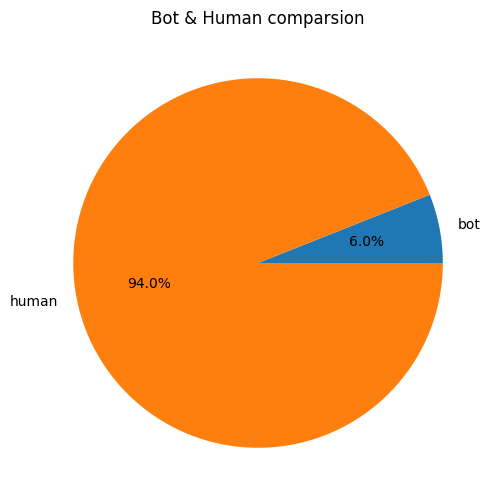

In [43]:
#7-4-1
labels1 = ["bot","human"]
values1 = []
values1.append((df["label"] == "Bot").sum())
values1.append((df["label"] == "Human").sum())
plt.figure(figsize= (6,6))
plt.pie(values1,labels = labels1, autopct='%1.1f%%')
plt.title("Bot & Human comparsion")

##选择饼图，能更好的反应机器与真人在账号中的占比

##结果真人账号比机器多得多

##反应了该社区的活跃度真实性较高，绝大多数账户是真人使用

(array([ 17.,  40.,  56.,  99.,  66.,  85.,  85.,  91.,  96., 142., 147.,
        127., 140.]),
 array([2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
        2017., 2018., 2019., 2020., 2021.]),
 <BarContainer object of 13 artists>)

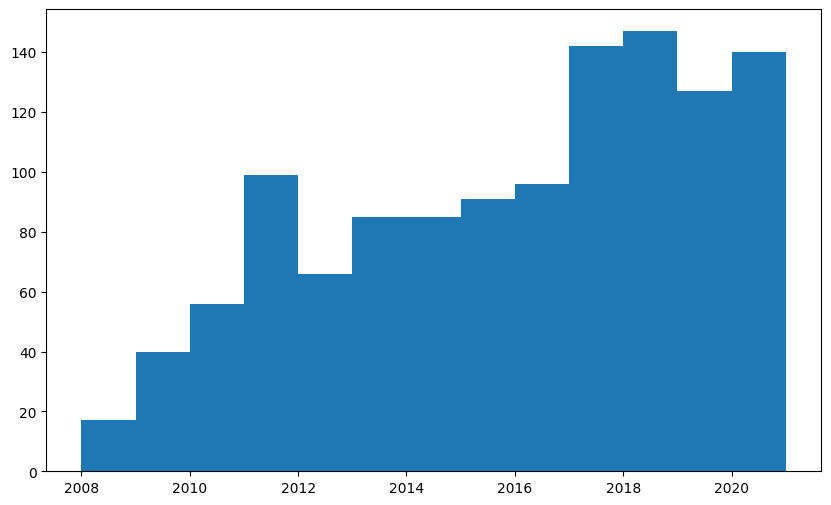

In [44]:
#7-4-2
times = df[df["label"] == "Bot"]["created_at"]
plt.figure(figsize=(10,6))
years = times.dt.year
labels2 = [x for x in range(years.min(),years.max() + 1)]
plt.hist(years ,bins = labels2)

##选择直方图，不仅可以清晰地反应每年的Bot注册量，还能反应出
# 逐年变化量。不选择折线图，因为years数据未进行排序，不易使用折线图。

##结果Bot新注册量基本在逐年增加，但在2017年和2020年基本保持不变

##反应了在2008年至2017年社区对机器人的需求在增加

(array([ 457.,  855., 1241., 1596., 2208., 2177., 1940., 1627., 1414.,
        1254., 1068., 1108., 1643.]),
 array([2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
        2017., 2018., 2019., 2020., 2021.]),
 <BarContainer object of 13 artists>)

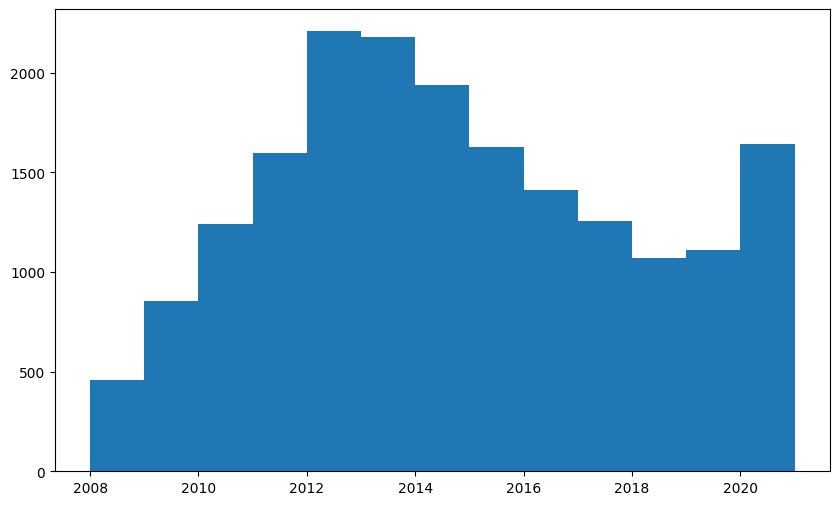

In [45]:
#7-4-3
times3 = df[df["label"] == "Human"]["created_at"]
plt.figure(figsize=(10,6))
years3 = times3.dt.year
labels3 = [x for x in range(years.min(),years.max() + 1)]
plt.hist(years3 ,bins = labels3)

##选择直方图，不仅可以清晰地反应每年的Human注册量，还能反应出逐年变化量。
# 不选择折线图，因为years数据未进行排序，不易使用折线图。

##在2008年到2012年，真人注册量在不断上升；2013年-2018年注册量不断减少，
# 2019-2020年注册量开始回升

##在早些年间（早于2012年）是社区大规模增长阶段，新注册用户一年比一年多，
# 在2013年到2018年社区热度降温，直至2019年注册人数再次回升。

In [46]:
# 定义图钉函数，标记出散点图的有趣的数据点
def pin_max(name,inf,itrst):
    max_index = np.argmax(inf)
    max_influence_value = inf[max_index]
    max_interest_value = itrst[max_index]
    max_name = name[max_index]
    
    plt.text(max_interest_value, max_influence_value, "Most Influential:{}".format(max_name), fontsize=12, ha='right', color='red')

    max_index = np.argmax(itrst) 
    max_influence_value = inf[max_index]
    max_interest_value = itrst[max_index]
    max_name = name[max_index]
    plt.text(max_interest_value, max_influence_value, "Most Interested:{}".format(max_name), fontsize=12, ha='right', color='red')


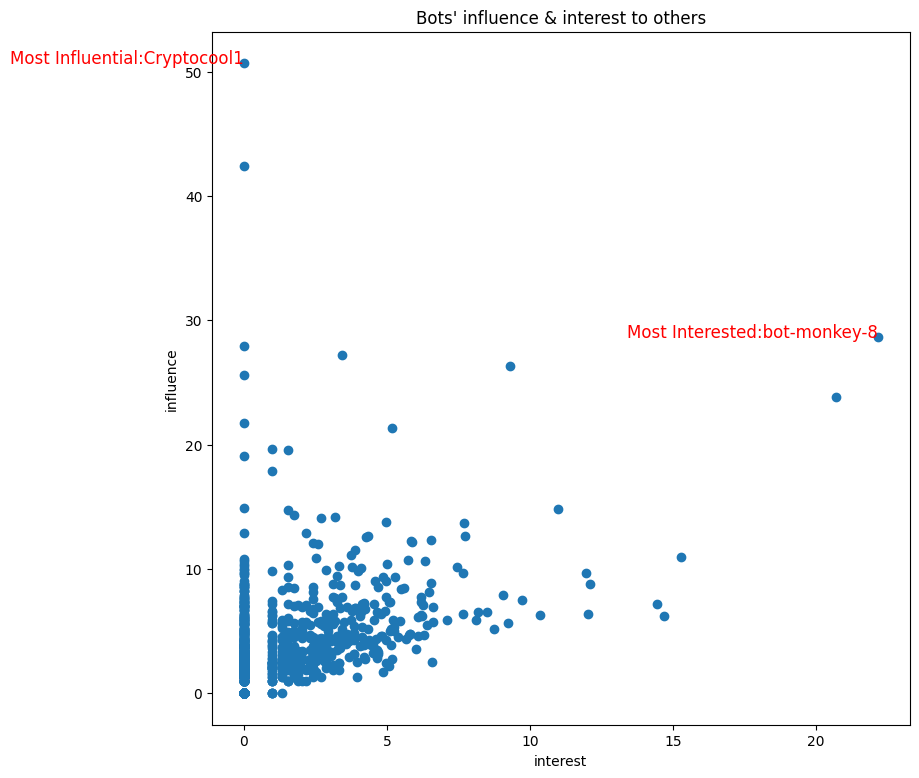

In [47]:
#7-4-4
influence_bot = np.array(df[df["label"] == "Bot"]["followers"])**0.4
interest_bot = np.array(df[df["label"] == "Bot"]["following"])**0.4
plt.figure(figsize=(9,9))
plt.scatter(y = influence_bot,x = interest_bot,marker = "o")
plt.title("Bots' influence & interest to others")
plt.xlabel("interest")
plt.ylabel("influence")
pin_max(df["login"],influence_bot,interest_bot)

##选用散点图，它能很好的反应数在二维甚至三维上的区别，
# 在这个图中，followers越多影响力越大，following越多对其他人的兴趣越大

##可看见大部分Bot账号处于较为普通状态，有少数Bot影响力或兴趣很高，
# 但未有影响力和兴趣都很高的bot

##该数据形状呈三角形，推测影响力最高的bot应该是某个官方Bot账号，
# 他未关注任何人，还有一些Bot关注量较大。

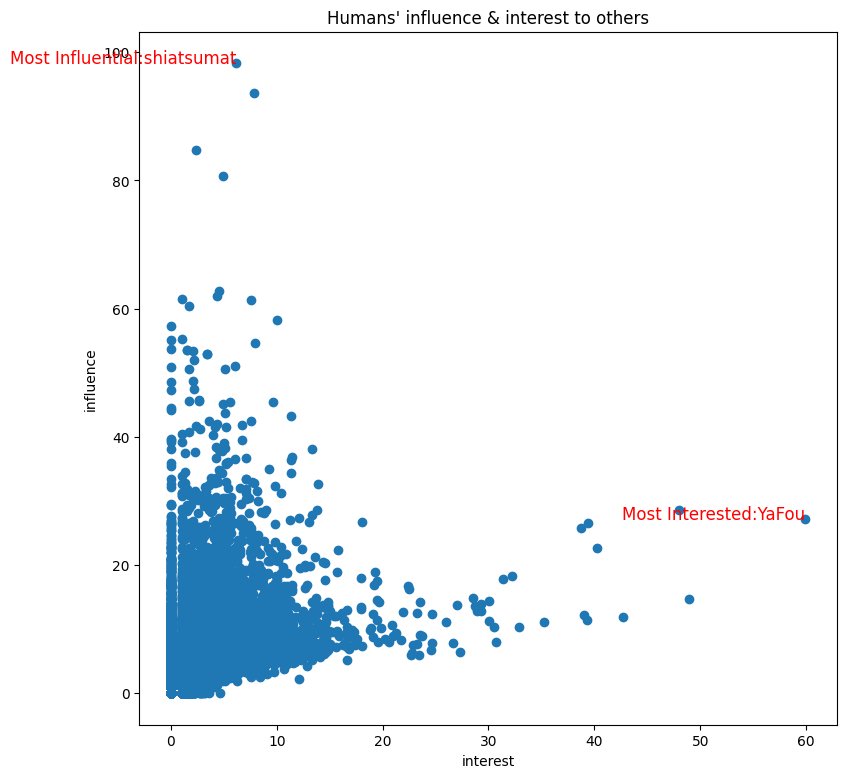

In [48]:
#7-4-5
influence_human = np.array(df[df["label"] == "Human"]["followers"])**0.4
interest_human = np.array(df[df["label"] == "Human"]["following"])**0.4
plt.figure(figsize=(9,9))
plt.scatter(y = influence_human,x = interest_human,marker = "o")
plt.title("Humans' influence & interest to others")
plt.xlabel("interest")
plt.ylabel("influence")
pin_max(df["login"],influence_human,interest_human)

##选用散点图，它能很好的反应数在二维甚至三维上的区别，
# 在这个图中，followers越多影响力越大，following越多对其他人的兴趣越大

##可看见大部分Human账号处于较为普通状态，有少数Human影响力或兴趣很高，
# 但未有影响力和兴趣都很高的Human

##该数据形状与Bot图相似，呈三角形，有4个人有这极高的影响力，
# 推测为一些大型工程的工程师或者一些开源项目的引导者，
# 这些较高影响力的人似乎没时间关注别人，他们的interst值普遍较低。
# 最右边的那个点是github中最爱学习的人